# Andrii Zadaianchuk 
## Naive implementration of unit maximization (without regularization)

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/matplotlib/cbook.py:128: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the matplotlib toolkit finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [35]:
random_image=np.random.randn(256,256)

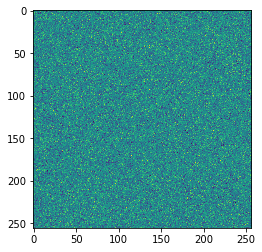

In [36]:
plt.imshow(random_image)

- A model
- An image to optimize

In [37]:
img_size=224

In [16]:
import torch
import torchvision.models as models

In [22]:
import os 
from os.path import join as pj
cwd = os.getcwd()
model_name='../alexnet-owt-4df8aa71.pth'
model_dir=cwd

In [24]:
alexnet=models.alexnet()
alexnet_weights = torch.load(pj(model_dir,model_name))
alexnet.load_state_dict(alexnet_weights)
alexnet.eval();

In [51]:
from torch.autograd import Variable
img=zeros((img_size,img_size,3),)
img=img.transpose(2,0,1)[None,:].astype(float32)
img_torch=Variable(torch.from_numpy(img),requires_grad=True)

In [52]:
img_torch

Variable containing:
( 0 , 0 ,.,.) = 
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
     ...       ⋱       ...    
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0

( 0 , 1 ,.,.) = 
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
     ...       ⋱       ...    
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0

( 0 , 2 ,.,.) = 
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
     ...       ⋱       ...    
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
[torch.FloatTensor of size 1x3x224x224]

In [57]:
target_class=10
output=alexnet(img_torch)
loss=-output[0,target_class]

In [62]:
loss.backward()

In [58]:
loss

Variable containing:
-1.7100
[torch.FloatTensor of size 1]

In [61]:
import torch.optim as optim

learning_rate=1e0
optimiser= optim.SGD([img_torch],lr=learning_rate)


In [70]:
max_iter= 30 

n_iter = 0 

while n_iter< max_iter:
    
    optimiser.zero_grad()
    
    output = alexnet(img_torch)
    loss= -output[0,target_class]
    loss.backward()
    n_iter+=1
    print("iteration: %d, loss: %.3f")%(n_iter,loss.data[0])
    optimiser.step()
    

iteration: 1, loss: -43.045
iteration: 2, loss: -38.781
iteration: 3, loss: -47.028
iteration: 4, loss: -63.801
iteration: 5, loss: -82.621
iteration: 6, loss: -92.586
iteration: 7, loss: -103.068
iteration: 8, loss: -112.255
iteration: 9, loss: -124.575
iteration: 10, loss: -141.584
iteration: 11, loss: -154.746
iteration: 12, loss: -165.213
iteration: 13, loss: -179.798
iteration: 14, loss: -192.362
iteration: 15, loss: -205.809
iteration: 16, loss: -217.633
iteration: 17, loss: -228.755
iteration: 18, loss: -238.783
iteration: 19, loss: -249.867
iteration: 20, loss: -260.124
iteration: 21, loss: -269.549
iteration: 22, loss: -279.104
iteration: 23, loss: -292.281
iteration: 24, loss: -303.248
iteration: 25, loss: -315.381
iteration: 26, loss: -326.288
iteration: 27, loss: -336.844
iteration: 28, loss: -347.478
iteration: 29, loss: -359.451
iteration: 30, loss: -369.462


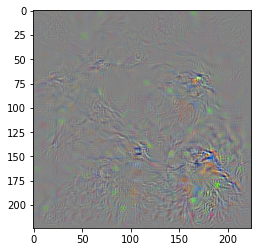

In [71]:
img_numpy=img_torch.data.numpy()[0,:].transpose(1,2,0)
img_numpy-= img_numpy.min()
img_numpy/= img_numpy.max()

imshow(img_numpy)

In [72]:
#load the list of object labels of the ImageNet Dataset that the network was trained on.
with open('synset_words.txt') as syn:
    class_labels = syn.readlines() 
class_labels = [label.split(' ', 1)[1].split('\n')[0] for label in class_labels]

In [74]:
class_labels[target_class]

'brambling, Fringilla montifringilla'